### **Import Libraries:**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr,pointbiserialr

### **Load Data:**

In [2]:
df = pd.read_csv('..\data\Cleaned_Churn_modelling.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Cash\AppData\Local\Temp\ipykernel_26736\3532598846.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\Cleaned_Churn_modelling.csv')


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42.0,2,0.00,1,1.0,1.0,101348.88,1,1,0,0
1,608,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,0,1
2,502,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1,0,0
3,699,0,39.0,1,0.00,2,0.0,0.0,93826.63,0,1,0,0
4,645,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1,0,0,1


### **Bivariate Analysis:**

#### **Continues Columns VS Binary Target Column:**

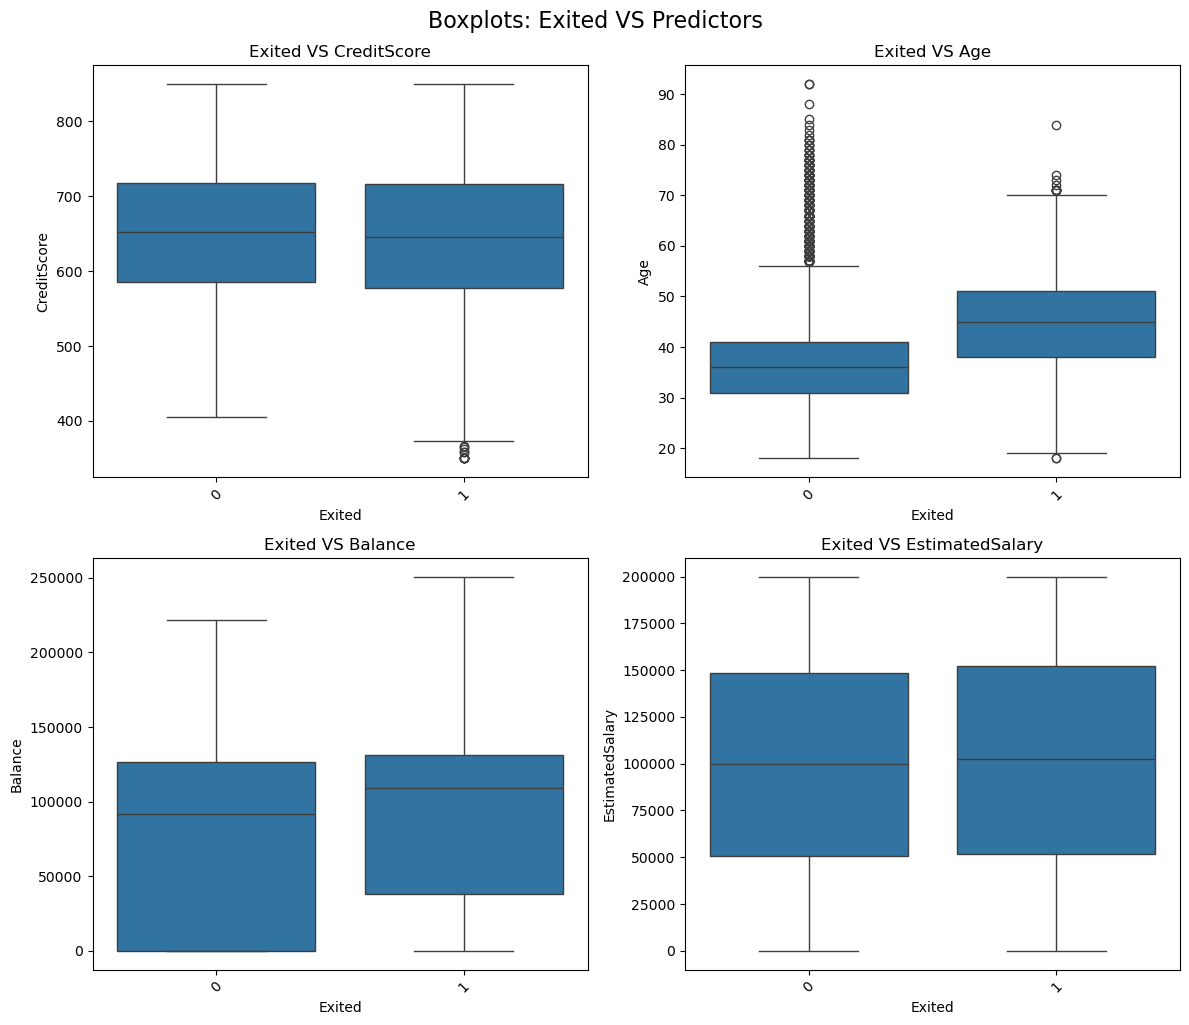

In [3]:
Continues_columns= ['CreditScore','Age','Balance','EstimatedSalary']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(Continues_columns):
    sns.boxplot(x=df['Exited'], y=df[var], ax=axes[i])
    axes[i].set_title(f'Exited VS {var}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle("Boxplots: Exited VS Predictors", fontsize=16, y=1.02)
plt.show()


In [4]:

# Loop and calculate point-biserial correlation
for var in Continues_columns:
        corr, p_value = pointbiserialr(df[var],df['Exited'])
        print(f"Exited VS {var}:\npointbiserialr correlation = {corr:.3f}, p-value = {p_value:.4f}\n")
    

Exited VS CreditScore:
pointbiserialr correlation = -0.027, p-value = 0.0068

Exited VS Age:
pointbiserialr correlation = 0.285, p-value = 0.0000

Exited VS Balance:
pointbiserialr correlation = 0.119, p-value = 0.0000

Exited VS EstimatedSalary:
pointbiserialr correlation = 0.012, p-value = 0.2290



#### **Ordinal Columns vs Binary Target Column:**

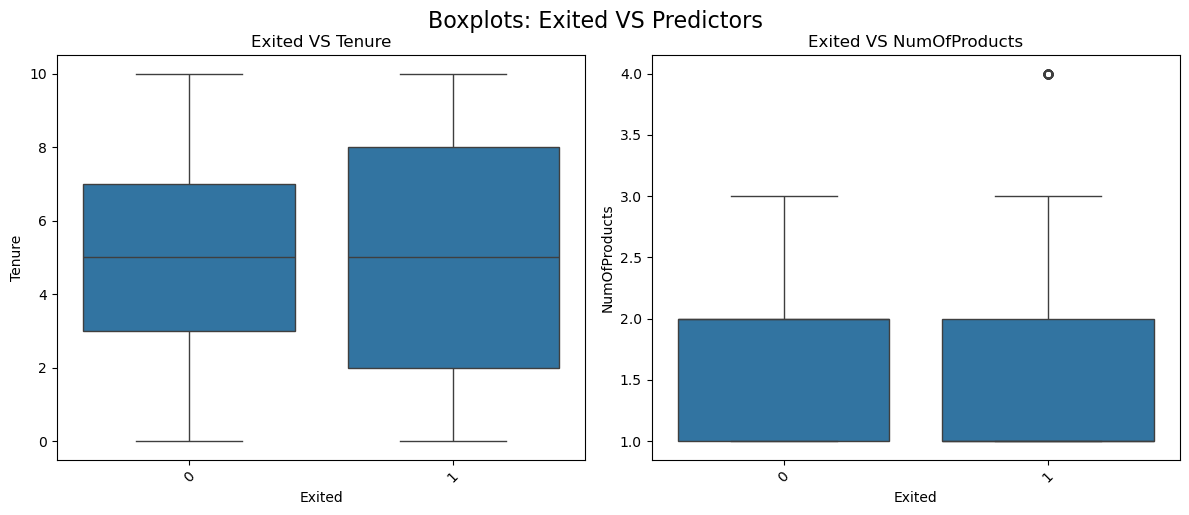

In [5]:
Ordinal_Columns = ['Tenure','NumOfProducts']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes = axes.flatten()

for i, var in enumerate(Ordinal_Columns):
    sns.boxplot(x=df['Exited'], y=df[var], ax=axes[i])
    axes[i].set_title(f'Exited VS {var}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle("Boxplots: Exited VS Predictors", fontsize=16, y=1.02)
plt.show()

In [6]:

# Loop and calculate point-biserial correlation
for var in Ordinal_Columns:
        corr, p_value = pointbiserialr(df[var],df['Exited'])
        print(f"Exited VS {var}:\npointbiserialr correlation = {corr:.3f}, p-value = {p_value:.4f}\n")
    

Exited VS Tenure:
pointbiserialr correlation = -0.014, p-value = 0.1579

Exited VS NumOfProducts:
pointbiserialr correlation = -0.048, p-value = 0.0000



#### **Binary Columns VS Binary Target Column:**

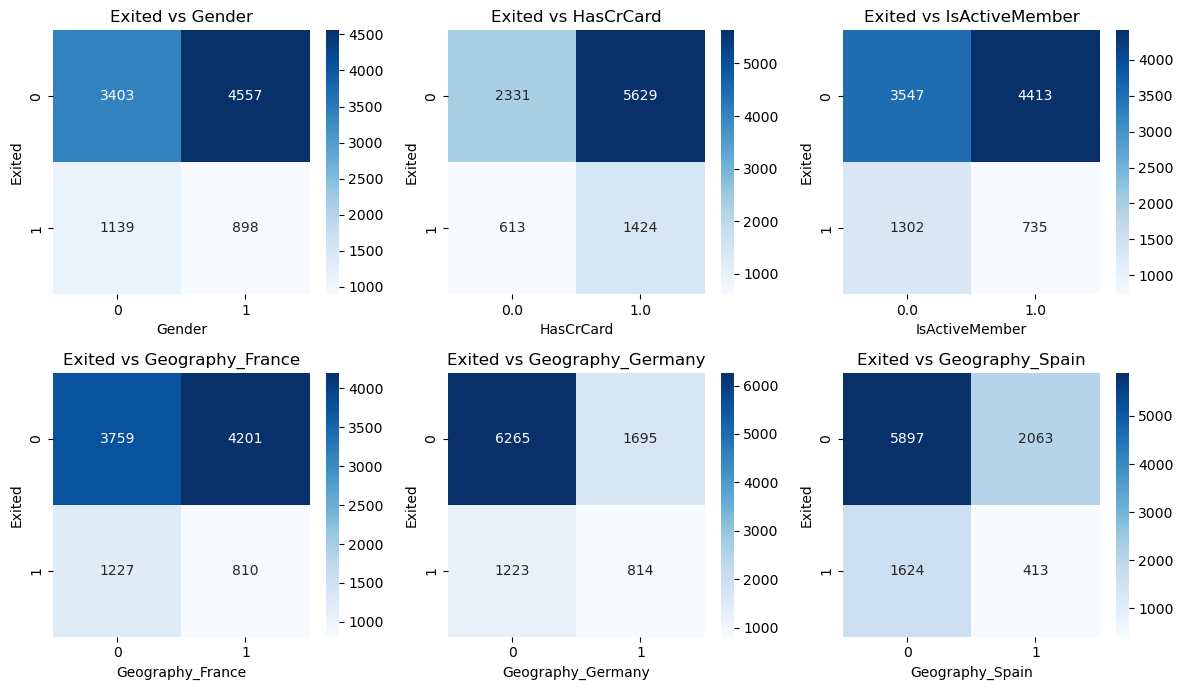

In [7]:
binary_columns = ['Gender','HasCrCard','IsActiveMember','Geography_France','Geography_Germany','Geography_Spain']
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Loop over binary columns and plot heatmaps
for i, col in enumerate(binary_columns):
    ct = pd.crosstab(df['Exited'], df[col])
    sns.heatmap(ct, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Exited vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Exited')
plt.tight_layout()
plt.show()

In [8]:


# Loop and calculate pearsonr correlation
for var in binary_columns:
        corr, p_value = pearsonr(df[var], df['Exited'])
        print(f"Exited VS {var}:\npearsonr correlation = {corr:.3f}, p-value = {p_value:.4f}\n")

Exited VS Gender:
pearsonr correlation = -0.106, p-value = 0.0000

Exited VS HasCrCard:
pearsonr correlation = -0.007, p-value = 0.4746

Exited VS IsActiveMember:
pearsonr correlation = -0.156, p-value = 0.0000

Exited VS Geography_France:
pearsonr correlation = -0.105, p-value = 0.0000

Exited VS Geography_Germany:
pearsonr correlation = 0.173, p-value = 0.0000

Exited VS Geography_Spain:
pearsonr correlation = -0.053, p-value = 0.0000

